In [1]:
import yfinance as yf
import pandas as pd
from pathlib import Path
from datetime import datetime
from dateutil.relativedelta import relativedelta


In [4]:
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent



In [5]:


from datetime import datetime, date
import time

OUT_DIR = PROJECT_ROOT / "data" / "datasets"
OUT_DIR.mkdir(parents=True, exist_ok=True)

name_to_ticker = {
    "Bitcoin": "BTC-USD", "Ethereum": "ETH-USD", "Binance Coin": "BNB-USD", "Ripple": "XRP-USD", "Cardano": "ADA-USD", "Solana": "SOL-USD", "Polkadot": "DOT-USD",
    "Dogecoin": "DOGE-USD", "Shiba Inu": "SHIB-USD", "Litecoin": "LTC-USD", "Chainlink": "LINK-USD", "Stellar": "XLM-USD", "Avalanche": "AVAX-USD", "Ethereum Classic": "ETC-USD",
    "Monero": "XMR-USD", "Algorand": "ALGO-USD", "Cosmos": "ATOM-USD", "Filecoin": "FIL-USD", "Internet Computer": "ICP-USD", "VeChain": "VET-USD", "Curve DAO Token": "CRV-USD",
    "Aave": "AAVE-USD", "EOS": "EOS-USD", "Tezos": "XTZ-USD", "Maker": "MKR-USD", "Theta Network": "THETA-USD", "Axie Infinity": "AXS-USD", "Decentraland": "MANA-USD",
    "Bitcoin Cash": "BCH-USD", "Dash": "DASH-USD",
}

tickers = list(name_to_ticker.values())

end_date = datetime.today().date()
start_date = (end_date - relativedelta(years=3)).isoformat()
end_date = end_date.isoformat()

print(f"Downloading data from {start_date} to {end_date}")
print(f"Total tickers to process: {len(tickers)}")
print("-" * 50)

successful_downloads = 0

for i, ticker in enumerate(tickers, 1):
    out_path = OUT_DIR / f"{ticker}.csv"
    try:
        df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)

        if df is None or df.empty:
            print(f"[{i}/{len(tickers)}] ❌ WARNING: No data available for {ticker}")
            continue

        if isinstance(df.columns, pd.MultiIndex):
            df.columns = [' '.join([str(i) for i in col if str(i) != '']).strip() for col in df.columns.values]

        df = df.reset_index()

        rename_map = {}
        for c in df.columns:
            lc = c.lower()
            if 'date' in lc:
                rename_map[c] = 'Date'
            elif lc.startswith('open'):
                rename_map[c] = 'Open'
            elif lc.startswith('high'):
                rename_map[c] = 'High'
            elif lc.startswith('low'):
                rename_map[c] = 'Low'
            elif 'adj' in lc and 'close' in lc:
                rename_map[c] = 'Adj Close'
            elif lc.startswith('close'):
                rename_map[c] = 'Close'
            elif 'volume' in lc:
                rename_map[c] = 'Volume'

        df = df.rename(columns=rename_map)

        required = ["Date", "Open", "High", "Low", "Close", "Volume"]
        missing_required = [c for c in required if c not in df.columns]
        if missing_required:
            print(f"[{i}/{len(tickers)}] ⚠️  WARNING: {ticker} missing columns {missing_required}")
            continue

        df["Symbol"] = ticker
        ordered = ["Date", "Symbol", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
        ordered_present = [c for c in ordered if c in df.columns]
        df = df[ordered_present]

        df.to_csv(out_path, index=False)
        successful_downloads += 1

        actual_start = df['Date'].min().strftime('%Y-%m-%d') if len(df) > 0 else 'N/A'
        actual_end = df['Date'].max().strftime('%Y-%m-%d') if len(df) > 0 else 'N/A'

        print(f"[{i}/{len(tickers)}] ✅ Saved {ticker} | Rows: {len(df):>4} | Dates: {actual_start} to {actual_end}")

        time.sleep(0.5)

    except KeyboardInterrupt:
        print("\n⚠️  Download interrupted by user.")
        break
    except Exception as e:
        print(f"[{i}/{len(tickers)}] ❌ ERROR {ticker}: {e}")
        time.sleep(1)


print(f"Failed downloads: {len(tickers) - successful_downloads}")

saved_files = sorted([p.name for p in OUT_DIR.glob('*.csv')])


Total tickers to process: 30
--------------------------------------------------
[1/30] ✅ Saved BTC-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)
C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[2/30] ✅ Saved ETH-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[3/30] ✅ Saved BNB-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[4/30] ✅ Saved XRP-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[5/30] ✅ Saved ADA-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[6/30] ✅ Saved SOL-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[7/30] ✅ Saved DOT-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[8/30] ✅ Saved DOGE-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[9/30] ✅ Saved SHIB-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[10/30] ✅ Saved LTC-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[11/30] ✅ Saved LINK-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[12/30] ✅ Saved XLM-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[13/30] ✅ Saved AVAX-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[14/30] ✅ Saved ETC-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[15/30] ✅ Saved XMR-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[16/30] ✅ Saved ALGO-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[17/30] ✅ Saved ATOM-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[18/30] ✅ Saved FIL-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[19/30] ✅ Saved ICP-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[20/30] ✅ Saved VET-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[21/30] ✅ Saved CRV-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[22/30] ✅ Saved AAVE-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[23/30] ✅ Saved EOS-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[24/30] ✅ Saved XTZ-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[25/30] ✅ Saved MKR-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[26/30] ✅ Saved THETA-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[27/30] ✅ Saved AXS-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[28/30] ✅ Saved MANA-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[29/30] ✅ Saved BCH-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3956384478.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[30/30] ✅ Saved DASH-USD | Rows: 1096 | Dates: 2023-01-15 to 2026-01-14
Failed downloads: 0


In [6]:
import glob
import os

data_path = PROJECT_ROOT / "data" / "datasets"

save_path = PROJECT_ROOT / "data" /"processed"/ "final_df.csv"

all_files = glob.glob(os.path.join(data_path, "*.csv"))

merged_list = []

for file in all_files:
    df = pd.read_csv(file)
    merged_list.append(df)

final_df = pd.concat(merged_list, ignore_index=True)

final_df = final_df.sort_values(["Symbol", "Date"]).reset_index(drop=True)

final_df.to_csv(save_path, index=False)

print(f"✅ Merged {len(all_files)} files.")
print(f"✅ Final shape: {final_df.shape}")
print(f"✅ Saved merged dataset to:\n{save_path}")

✅ Merged 30 files.
✅ Final shape: (32880, 7)
✅ Saved merged dataset to:
c:\Users\metalvampire77\Desktop\solent university\programming_for_problem_solving\crypto_forecasting_system\data\processed\final_df.csv


In [7]:
import os

csv_files = [f for f in os.listdir(OUT_DIR) if f.endswith('.csv')]
file_row_counts = []

for filename in csv_files:
    file_path = OUT_DIR / filename
    df = pd.read_csv(file_path)
    row_count = df.shape[0]
    file_row_counts.append({"Filename": filename, "Row Count": row_count})
row_counts_df = pd.DataFrame(file_row_counts)
display(row_counts_df)

,Filename,Row Count
0,AAVE-USD.csv,1096
1,ADA-USD.csv,1096
2,ALGO-USD.csv,1096
3,ATOM-USD.csv,1096
4,AVAX-USD.csv,1096
5,AXS-USD.csv,1096
6,BCH-USD.csv,1096
7,BNB-USD.csv,1096
8,BTC-USD.csv,1096
9,CRV-USD.csv,1096


#Data preprocessing


In [8]:
print(f"length of dataset {len(final_df)}")
missing_values = final_df.isnull().sum()
print("Missing values:")
print(missing_values)

duplicate_rows = final_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

length of dataset 32880
Missing values:
Date      0
Symbol    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Number of duplicate rows: 0


In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    32880 non-null  object 
 1   Symbol  32880 non-null  object 
 2   Open    32880 non-null  float64
 3   High    32880 non-null  float64
 4   Low     32880 non-null  float64
 5   Close   32880 non-null  float64
 6   Volume  32880 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [10]:
final_df['Date'] = pd.to_datetime(final_df['Date'])

final_df['Volume'] = final_df['Volume'].astype(float)

name_to_ticker_inverse = {v: k for k, v in name_to_ticker.items()}
final_df['Name'] = final_df['Symbol'].map(name_to_ticker_inverse)

In [11]:
from pathlib import Path

output_dir = PROJECT_ROOT / "data" / "processed"
output_dir.mkdir(parents=True, exist_ok=True)

output_file_path = output_dir / "final_df.csv"

final_df.to_csv(output_file_path, index=False)

print(f"✅ Saved preprocessed final_df to: {output_file_path}")

✅ Saved preprocessed final_df to: c:\Users\metalvampire77\Desktop\solent university\programming_for_problem_solving\crypto_forecasting_system\data\processed\final_df.csv


#EDA

In [12]:
print(f"Total rows: {final_df.shape[0]}")
print(f"Total columns: {final_df.shape[1]}")

min_date = final_df['Date'].min().strftime('%Y-%m-%d')
max_date = final_df['Date'].max().strftime('%Y-%m-%d')
print(f"\nData period: from {min_date} to {max_date}")



Total rows: 32880
Total columns: 8

Data period: from 2023-01-15 to 2026-01-14


In [13]:
coin_stats = final_df.groupby('Symbol')[['Open', 'High', 'Low', 'Close', 'Volume']].describe()

print("Descriptive statistics for each coin:")
display(coin_stats)

most_volatile_coin = coin_stats['Close']['std'].idxmax()
highest_volatility_std = coin_stats['Close']['std'].max()

print(f"\nMost volatile coin (based on standard deviation of Close price): {most_volatile_coin} (Std Dev: {highest_volatility_std:.2f})")

most_liquid_coin = coin_stats['Volume']['mean'].idxmax()
highest_average_volume = coin_stats['Volume']['mean'].max()

print(f"Coin with highest average volume (liquidity): {most_liquid_coin} (Average Volume: {highest_average_volume:.2f})")

highest_average_price_coin = coin_stats['Close']['mean'].idxmax()
highest_average_price = coin_stats['Close']['mean'].max()

print(f"Coin with highest average close price: {highest_average_price_coin} (Average Close Price: {highest_average_price:.2f})")

Descriptive statistics for each coin:


Open                                                          \
            count          mean           std           min           25%   
Symbol                                                                      
AAVE-USD   1096.0    150.806579     85.253118     50.136364     83.354919   
ADA-USD    1096.0      0.530497      0.219974      0.241868      0.358640   
ALGO-USD   1096.0      0.191644      0.075873      0.088549      0.132834   
ATOM-USD   1096.0      7.186851      3.144500      1.852333      4.493187   
AVAX-USD   1096.0     24.425312     10.767701      8.787215     16.647734   
AXS-USD    1096.0      5.443542      2.697176      0.803547      2.891467   
BCH-USD    1096.0    353.637128    151.500771    101.795403    234.913326   
BNB-USD    1096.0    534.831517    240.718665    205.225800    307.578926   
BTC-USD    1096.0  66366.942543  31498.449860  20187.876953  30576.739746   
CRV-USD    1096.0      0.607727      0.236428      0.209619      0.433546   
DASH-USD   1096.0     34.000772     13.926736     18.294806     24.314429   
DOGE-USD   1096.0      0.150106      0.085378      0.057897      0.080593   
DOT-USD    1096.0      5.314534      1.780031      1.682421      4.102341   
EOS-USD    1096.0      0.685272      0.251868      0.147357      0.525805   
ETC-USD    1096.0     20.745844      5.109548     11.460597     17.497746   
ETH-USD    1096.0   2657.869950    829.606339   1429.100830   1870.238129   
FIL-USD    1096.0      4.224693      1.815489      1.187652      2.851940   
ICP-USD    1096.0      7.054979      3.473901      2.803884      4.613581   
LINK-USD   1096.0     13.693485      5.330219      5.119935      8.114057   
LTC-USD    1096.0     86.463416     17.129522     55.983974     71.650381   
MANA-USD   1096.0      0.391527      0.145682      0.116481      0.287862   
MKR-USD    1096.0   1610.526091    646.154038    616.995056   1211.564697   
SHIB-USD   1096.0      0.000014      0.000006      0.000007      0.000009   
SOL-USD    1096.0    119.696200     69.756847     14.486286     26.322228   
THETA-USD  1096.0      1.158914      0.635142      0.260028      0.742835   
VET-USD    1096.0      0.026367      0.010043      0.009793      0.019961   
XLM-USD    1096.0      0.192398      0.118896      0.076318      0.099950   
XMR-USD    1096.0    205.896695     83.603432    105.000443    152.542015   
XRP-USD    1096.0      1.268176      0.964793      0.360636      0.515917   
XTZ-USD    1096.0      0.850521      0.252385      0.429519      0.663218   

                                                        High                \
                    50%           75%            max   count          mean   
Symbol                                                                       
AAVE-USD     116.431931    205.784996     384.035278  1096.0    156.245116   
ADA-USD        0.451376      0.684703       1.231081  1096.0      0.547478   
ALGO-USD       0.182427      0.229868       0.515730  1096.0      0.198527   
ATOM-USD       6.783353      9.589635      15.148700  1096.0      7.373181   
AVAX-USD      22.023985     31.617937      60.689945  1096.0     25.281690   
AXS-USD        5.449658      7.332163      12.680500  1096.0      5.614420   
BCH-USD      345.275024    478.166809     695.160400  1096.0    364.047136   
BNB-USD      576.372375    663.280319    1310.227661  1096.0    545.434786   
BTC-USD    65119.246094  95538.615234  124752.140625  1096.0  67518.382695   
CRV-USD        0.567853      0.782859       1.265606  1096.0      0.631445   
DASH-USD      29.356464     39.016690     121.684570  1096.0     35.258128   
DOGE-USD       0.131669      0.189700       0.467299  1096.0      0.155502   
DOT-USD        5.030979      6.446470      11.542891  1096.0      5.467962   
EOS-USD        0.673521      0.817712       1.372282  1096.0      0.705893   
ETC-USD       19.654160     23.060194      38.426056  1096.0     21.310680   
ETH-USD     2536.241211   3308.571289    4831.088379  1096.0   2720


Most volatile coin (based on standard deviation of Close price): BTC-USD (Std Dev: 31481.87)
Coin with highest average volume (liquidity): BTC-USD (Average Volume: 36487176516.43)
Coin with highest average close price: BTC-USD (Average Close Price: 66436.73)


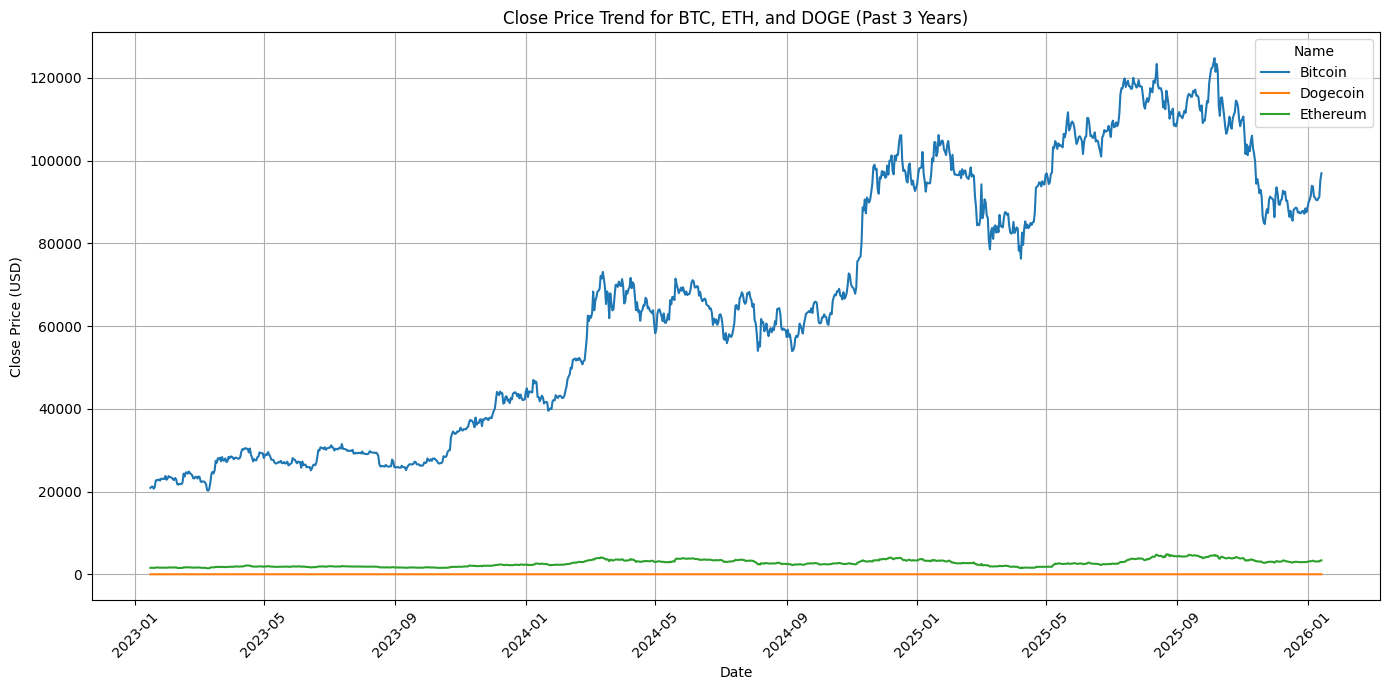

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_coins = ['BTC-USD', 'ETH-USD', 'DOGE-USD']
filtered_df = final_df[final_df['Symbol'].isin(selected_coins)].copy()

plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_df, x='Date', y='Close', hue='Name')
plt.title('Close Price Trend for BTC, ETH, and DOGE (Past 3 Years)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

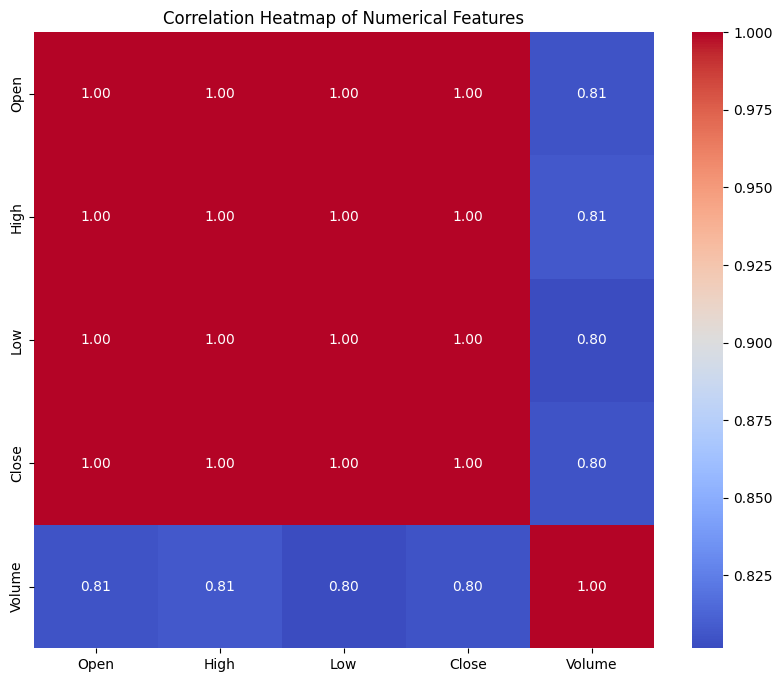

In [15]:
correlation_matrix = final_df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [16]:
btc_df = final_df[final_df['Symbol'] == 'BTC-USD'].copy()
print(f"Shape of BTC-USD DataFrame: {btc_df.shape}")
btc_df.head()

Shape of BTC-USD DataFrame: (1096, 8)


,Date,Symbol,Open,High,Low,Close,Volume,Name
8768,2023-01-15,BTC-USD,20977.484375,20993.748047,20606.986328,20880.798828,1.929841e+10,Bitcoin
8769,2023-01-16,BTC-USD,20882.224609,21360.875000,20715.746094,21169.632812,2.679249e+10,Bitcoin
8770,2023-01-17,BTC-USD,21175.833984,21438.660156,20978.533203,21161.519531,2.499998e+10,Bitcoin
8771,2023-01-18,BTC-USD,21161.050781,21564.501953,20541.544922,20688.781250,3.000563e+10,Bitcoin
8772,2023-01-19,BTC-USD,20686.746094,21163.011719,20685.380859,21086.792969,2.115285e+10,Bitcoin


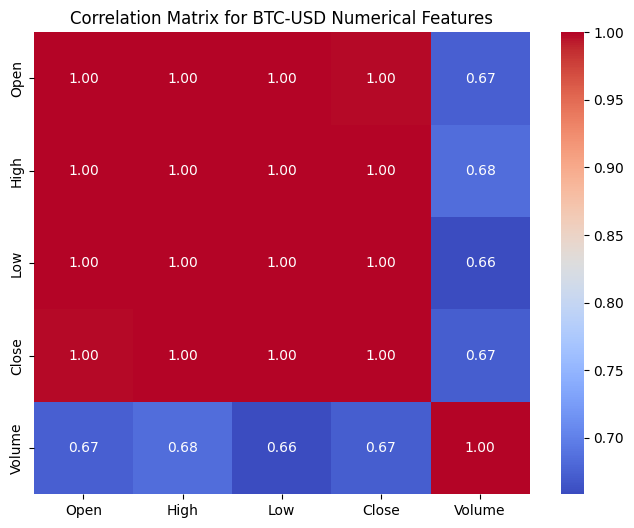

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
btc_numerical_df = btc_df[numerical_cols]

btc_correlation_matrix = btc_numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(btc_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for BTC-USD Numerical Features')
plt.show()

Saved correlation_matrix.csv and correlation_summary.csv to data
Sample (first 5 rows):


,Symbol,top1_pos,top1_pos_val,top2_pos,top2_pos_val,top3_pos,top3_pos_val,top4_pos,top4_pos_val,top1_neg,top1_neg_val,top2_neg,top2_neg_val,top3_neg,top3_neg_val,top4_neg,top4_neg_val
0,AAVE-USD,ETH-USD,0.741603,LINK-USD,0.704688,ETC-USD,0.695010,DOT-USD,0.666764,XMR-USD,0.332359,SHIB-USD,0.440488,XLM-USD,0.444094,DASH-USD,0.449677
1,ADA-USD,DOT-USD,0.757798,ALGO-USD,0.734799,AVAX-USD,0.712670,VET-USD,0.707695,XMR-USD,0.330810,MKR-USD,0.366461,DASH-USD,0.472634,SHIB-USD,0.481707
2,ALGO-USD,DOT-USD,0.781106,VET-USD,0.763511,ATOM-USD,0.756348,THETA-USD,0.748098,XMR-USD,0.362945,MKR-USD,0.430653,SHIB-USD,0.496571,BCH-USD,0.507371
3,ATOM-USD,DOT-USD,0.838672,AXS-USD,0.787702,MANA-USD,0.782385,VET-USD,0.768221,XMR-USD,0.369863,MKR-USD,0.440917,DASH-USD,0.498607,BCH-USD,0.518396
4,AVAX-USD,DOT-USD,0.778702,ALGO-USD,0.739188,LINK-USD,0.737365,THETA-USD,0.730450,XMR-USD,0.376585,MKR-USD,0.440873,DASH-USD,0.484284,SHIB-USD,0.508827


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3119759502.py:73: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = sch.linkage(1 - corr.fillna(0).values, method='average')


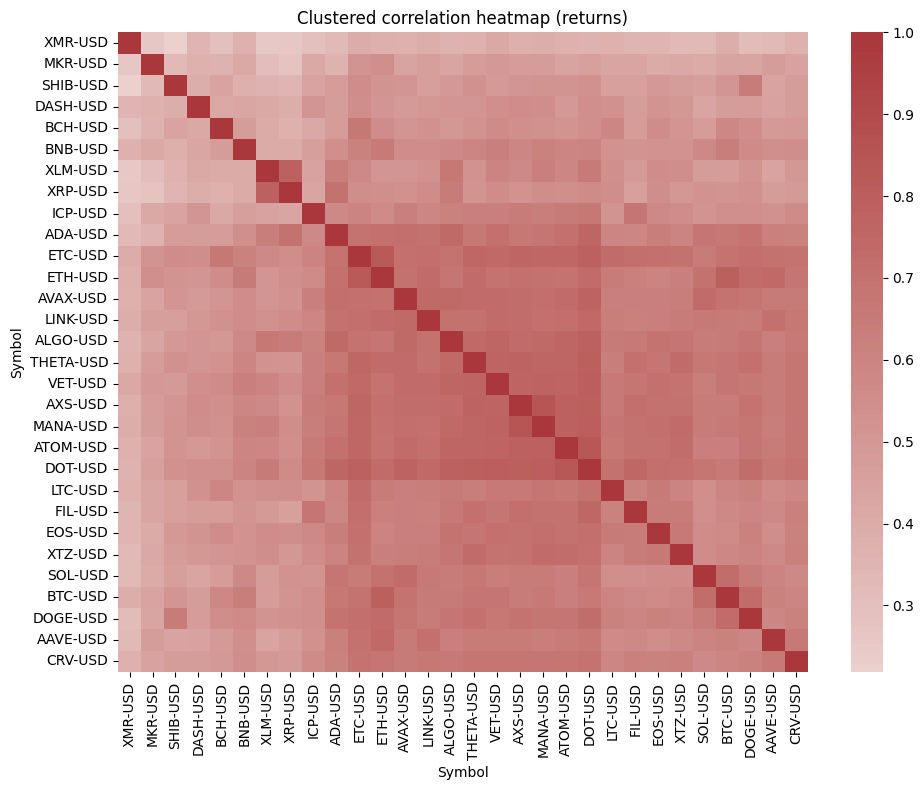

Saved heatmap to data\correlation_heatmap.png


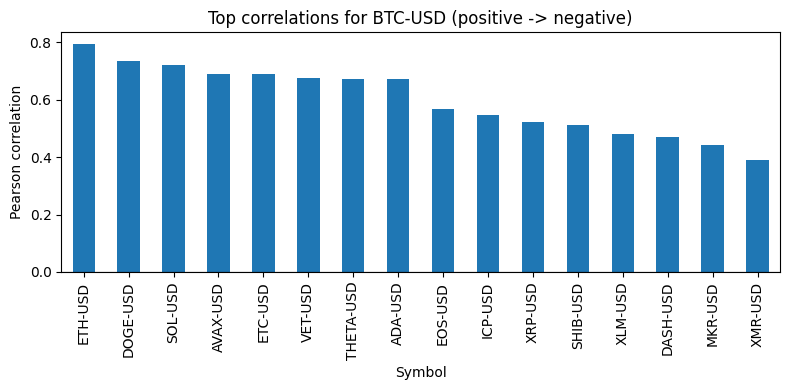

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

OUT_DIR = "data"
os.makedirs(OUT_DIR, exist_ok=True)

if 'final_df' not in globals():
    raise RuntimeError("final_df not found. Run feature engineering / load your master dataframe first.")

if 'pct_change' in final_df.columns:
    ret_col = 'pct_change'
elif 'log_return' in final_df.columns:
    ret_col = 'log_return'
else:
    final_df = final_df.sort_values(['Symbol','Date']).copy()
    final_df['pct_change'] = final_df.groupby('Symbol')['Close'].pct_change()
    ret_col = 'pct_change'

pivot = final_df.pivot_table(index='Date', columns='Symbol', values=ret_col, aggfunc='first')

thresh = int(0.70 * pivot.shape[0])
pivot_clean = pivot.dropna(axis=1, thresh=thresh).copy()

pivot_clean = pivot_clean.fillna(0)

corr = pivot_clean.corr(method='pearson')

corr.to_csv(os.path.join(OUT_DIR, "correlation_matrix.csv"))

summary_rows = []
symbols = corr.index.tolist()

for s in symbols:
    row = corr[s].drop(labels=[s])
    sorted_pos = row.sort_values(ascending=False)
    top4_pos = sorted_pos.head(4).index.tolist()
    top4_pos_vals = sorted_pos.head(4).values.tolist()
    top4_neg = sorted_pos.tail(4).index.tolist()[::-1]
    top4_neg_vals = sorted_pos.tail(4).values.tolist()[::-1]
    summary_rows.append({
        'Symbol': s,
        'top1_pos': top4_pos[0] if len(top4_pos)>0 else None,
        'top1_pos_val': top4_pos_vals[0] if len(top4_pos_vals)>0 else None,
        'top2_pos': top4_pos[1] if len(top4_pos)>1 else None,
        'top2_pos_val': top4_pos_vals[1] if len(top4_pos_vals)>1 else None,
        'top3_pos': top4_pos[2] if len(top4_pos)>2 else None,
        'top3_pos_val': top4_pos_vals[2] if len(top4_pos_vals)>2 else None,
        'top4_pos': top4_pos[3] if len(top4_pos)>3 else None,
        'top4_pos_val': top4_pos_vals[3] if len(top4_pos_vals)>3 else None,
        'top1_neg': top4_neg[0] if len(top4_neg)>0 else None,
        'top1_neg_val': top4_neg_vals[0] if len(top4_neg_vals)>0 else None,
        'top2_neg': top4_neg[1] if len(top4_neg)>1 else None,
        'top2_neg_val': top4_neg_vals[1] if len(top4_neg_vals)>1 else None,
        'top3_neg': top4_neg[2] if len(top4_neg)>2 else None,
        'top3_neg_val': top4_neg_vals[2] if len(top4_neg_vals)>2 else None,
        'top4_neg': top4_neg[3] if len(top4_neg)>3 else None,
        'top4_neg_val': top4_neg_vals[3] if len(top4_neg_vals)>3 else None,
    })

summary_df = pd.DataFrame(summary_rows)
summary_df.to_csv(os.path.join(OUT_DIR, "correlation_summary.csv"), index=False)

print("Saved correlation_matrix.csv and correlation_summary.csv to", OUT_DIR)
print("Sample (first 5 rows):")
display(summary_df.head())

try:
    import scipy.cluster.hierarchy as sch

    linkage = sch.linkage(1 - corr.fillna(0).values, method='average')
    dendro = sch.dendrogram(linkage, no_plot=True)
    order = dendro['leaves']
    ordered_corr = corr.iloc[order, order]

    plt.figure(figsize=(10,8))
    sns.heatmap(ordered_corr, cmap='vlag', center=0, xticklabels=True, yticklabels=True, square=False)
    plt.title("Clustered correlation heatmap (returns)")
    plt.tight_layout()
    heatmap_path = os.path.join(OUT_DIR, "correlation_heatmap.png")
    plt.savefig(heatmap_path, dpi=150)
    plt.show()
    print("Saved heatmap to", heatmap_path)
except Exception as e:
    print("Heatmap skipped (scipy may be missing or clustering failed):", e)

def plot_coin_correlation(symbol, top_n=10):
    if symbol not in corr.columns:
        raise KeyError(f"{symbol} not found in correlation matrix.")
    series = corr[symbol].drop(labels=[symbol]).sort_values(ascending=False)
    top = pd.concat([series.head(top_n), series.tail(top_n)])
    plt.figure(figsize=(8,4))
    top.plot(kind='bar', color=['tab:blue' if v>=0 else 'tab:red' for v in top.values])
    plt.title(f"Top correlations for {symbol} (positive -> negative)")
    plt.ylabel("Pearson correlation")
    plt.axhline(0, color='k', linewidth=0.8)
    plt.tight_layout()
    plt.show()

if 'selected_coins' in globals() and len(selected_coins)>0:
    plot_coin_correlation(selected_coins[0], top_n=8)

In [19]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        32880 non-null  datetime64[ns]
 1   Symbol      32880 non-null  object        
 2   Open        32880 non-null  float64       
 3   High        32880 non-null  float64       
 4   Low         32880 non-null  float64       
 5   Close       32880 non-null  float64       
 6   Volume      32880 non-null  float64       
 7   Name        32880 non-null  object        
 8   pct_change  32850 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.3+ MB


#feature engineering

In [20]:
import numpy as np
import pandas as pd

from scipy.stats import skew, kurtosis

def _rsi(series, window=14):
    delta = series.diff()
    up = delta.clip(lower=0)
    down = (-delta).clip(lower=0)
    ma_up = up.rolling(window=window, min_periods=1).mean()
    ma_down = down.rolling(window=window, min_periods=1).mean()
    rs = ma_up / (ma_down + 1e-12)
    return 100 - (100 / (1 + rs))


def _macd(close, n_fast=12, n_slow=26, n_signal=9):
    ema_fast = close.ewm(span=n_fast, adjust=False).mean()
    ema_slow = close.ewm(span=n_slow, adjust=False).mean()
    macd = ema_fast - ema_slow
    signal = macd.ewm(span=n_signal, adjust=False).mean()
    hist = macd - signal
    return macd, signal, hist


def _atr(high, low, close, window=14):
    prev = close.shift(1)
    tr1 = high - low
    tr2 = (high - prev).abs()
    tr3 = (low - prev).abs()
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    return tr.rolling(window=window, min_periods=1).mean()


def _rolling_max_drawdown(series, window=30):
    roll_max = series.rolling(window=window, min_periods=1).max()
    dd = series / roll_max - 1
    return dd.rolling(window=window, min_periods=1).min()



final_df['Date'] = pd.to_datetime(final_df['Date'], errors='coerce')
for col in ['Open','High','Low','Close','Volume']:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')

final_df = final_df.sort_values(['Symbol','Date']).reset_index(drop=True)

grp = final_df.groupby("Symbol", group_keys=False)

final_df['pct_change']  = grp['Close'].pct_change()
final_df['log_return']  = np.log(final_df['Close']).diff()

final_df['lag_1'] = grp['Close'].shift(1)
final_df['lag_7'] = grp['Close'].shift(7)

windows = [7,14,21]
for w in windows:
    final_df[f'roll_mean_{w}'] = grp['Close'].transform(lambda s: s.rolling(w, min_periods=1).mean())
    final_df[f'roll_std_{w}']  = grp['Close'].transform(lambda s: s.rolling(w, min_periods=1).std(ddof=0)).fillna(0)
    final_df[f'roll_max_{w}']  = grp['Close'].transform(lambda s: s.rolling(w, min_periods=1).max())
    final_df[f'roll_min_{w}']  = grp['Close'].transform(lambda s: s.rolling(w, min_periods=1).min())
    final_df[f'volatility_{w}'] = grp['pct_change'].transform(
        lambda s: s.rolling(w, min_periods=1).std().fillna(0) * np.sqrt(252)
    )

final_df['rsi_14'] = grp['Close'].transform(lambda s: _rsi(s, 14))
final_df['atr_14'] = grp.apply(lambda g: _atr(g['High'], g['Low'], g['Close'], 14)).reset_index(level=0, drop=True)

final_df['macd'] = np.nan
final_df['macd_signal'] = np.nan
final_df['macd_hist'] = np.nan
for sym, g in final_df.groupby('Symbol'):
    m, sig, h = _macd(g['Close'])
    final_df.loc[g.index, 'macd'] = m.values
    final_df.loc[g.index, 'macd_signal'] = sig.values
    final_df.loc[g.index, 'macd_hist'] = h.values

final_df['drawdown_30'] = grp['Close'].transform(lambda s: _rolling_max_drawdown(s, 30))

final_df['vol_mean_7'] = grp['Volume'].transform(lambda s: s.rolling(7, min_periods=1).mean())
final_df['vol_mean_21'] = grp['Volume'].transform(lambda s: s.rolling(21, min_periods=1).mean())

final_df['target_next_close'] = grp['Close'].shift(-1)
final_df['target_next_pct'] = final_df['target_next_close'] / final_df['Close'] - 1

final_df = final_df.replace([np.inf, -np.inf], np.nan)

print("Feature engineering completed.")
print("Rows:", final_df.shape)
print("Missing values:", final_df.isna().sum().sort_values(ascending=False).head(10))


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\2352581257.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df['atr_14'] = grp.apply(lambda g: _atr(g['High'], g['Low'], g['Close'], 14)).reset_index(level=0, drop=True)


Feature engineering completed.
Rows: (32880, 37)
Missing values: lag_7                210
rsi_14                30
lag_1                 30
pct_change            30
target_next_close     30
target_next_pct       30
log_return             1
Low                    0
Symbol                 0
Date                   0
dtype: int64


In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               32880 non-null  datetime64[ns]
 1   Symbol             32880 non-null  object        
 2   Open               32880 non-null  float64       
 3   High               32880 non-null  float64       
 4   Low                32880 non-null  float64       
 5   Close              32880 non-null  float64       
 6   Volume             32880 non-null  float64       
 7   Name               32880 non-null  object        
 8   pct_change         32850 non-null  float64       
 9   log_return         32879 non-null  float64       
 10  lag_1              32850 non-null  float64       
 11  lag_7              32670 non-null  float64       
 12  roll_mean_7        32880 non-null  float64       
 13  roll_std_7         32880 non-null  float64       
 14  roll_m

In [22]:
final_df = final_df.sort_values(["Symbol", "Date"]).reset_index(drop=True)

final_df["row_num"] = final_df.groupby("Symbol").cumcount()
final_df = final_df[final_df["row_num"] >= 30]

final_df["row_num"] = final_df.groupby("Symbol").cumcount()
final_df["max_row"] = final_df.groupby("Symbol")["row_num"].transform("max")
final_df = final_df[final_df["row_num"] != final_df["max_row"]]

final_df["volatility_21"] = final_df.groupby("Symbol")["volatility_21"].ffill()

final_df = final_df.drop(columns=["row_num", "max_row"])

final_df = final_df.dropna()

print("After cleaning, rows:", final_df.shape)
print("Number of coins:", final_df["Symbol"].nunique())
print(final_df["Symbol"].value_counts().head())
print("Remaining NaNs:", final_df.isna().sum().sum())


After cleaning, rows: (31950, 37)
Number of coins: 30
Symbol
AAVE-USD    1065
ADA-USD     1065
ALGO-USD    1065
ATOM-USD    1065
AVAX-USD    1065
Name: count, dtype: int64
Remaining NaNs: 0


In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31950 entries, 30 to 32878
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               31950 non-null  datetime64[ns]
 1   Symbol             31950 non-null  object        
 2   Open               31950 non-null  float64       
 3   High               31950 non-null  float64       
 4   Low                31950 non-null  float64       
 5   Close              31950 non-null  float64       
 6   Volume             31950 non-null  float64       
 7   Name               31950 non-null  object        
 8   pct_change         31950 non-null  float64       
 9   log_return         31950 non-null  float64       
 10  lag_1              31950 non-null  float64       
 11  lag_7              31950 non-null  float64       
 12  roll_mean_7        31950 non-null  float64       
 13  roll_std_7         31950 non-null  float64       
 14  roll_max_7

#clustering

In [24]:
import numpy as np
import pandas as pd

numeric_cols = final_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

remove_cols = ['target_next_close', 'target_next_pct']
numeric_cols = [c for c in numeric_cols if c not in remove_cols]

final_df_agg = final_df.groupby('Symbol')[numeric_cols].agg(['mean','std'])

final_df_agg.columns = ['_'.join(col).strip() for col in final_df_agg.columns]
final_df_agg = final_df_agg.reset_index()

print("Aggregated shape:", final_df_agg.shape)
print(final_df_agg.head(3))


Aggregated shape: (30, 65)
     Symbol   Open_mean   Open_std   High_mean   High_std    Low_mean  \
0  AAVE-USD  152.662396  85.729990  158.163191  89.328469  147.073336   
1   ADA-USD    0.535012   0.221503    0.552207   0.232430    0.517424   
2  ALGO-USD    0.190088   0.076289    0.196932   0.081715    0.182990   

     Low_std  Close_mean  Close_std   Volume_mean  ...  macd_signal_mean  \
0  82.098587  152.749825  85.698812  2.540227e+08  ...          0.560472   
1   0.210788    0.535055   0.221511  7.578835e+08  ...          0.000131   
2   0.071395    0.189982   0.076277  1.019403e+08  ...         -0.000801   

   macd_signal_std  macd_hist_mean  macd_hist_std  drawdown_30_mean  \
0         8.696922       -0.011341       2.570036         -0.245493   
1         0.030980       -0.000028       0.009621         -0.248643   
2         0.013036       -0.000013       0.004188         -0.276408   

   drawdown_30_std  vol_mean_7_mean  vol_mean_7_std  vol_mean_21_mean  \
0         0.07573

In [25]:
sharpe_auto = final_df.groupby('Symbol').apply(
    lambda g: pd.Series({
        'sharpe_ratio': g['pct_change'].mean() / (g['pct_change'].std() + 1e-9),
        'autocorr1': g['pct_change'].autocorr(1)
    })
).reset_index()

final_df_agg = final_df_agg.merge(sharpe_auto, on='Symbol', how='left')

print("Shape after Sharpe/Autocorr:", final_df_agg.shape)


Shape after Sharpe/Autocorr: (30, 67)


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_644\3091328063.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sharpe_auto = final_df.groupby('Symbol').apply(


In [26]:
from sklearn.preprocessing import StandardScaler

X = final_df_agg.drop(columns=['Symbol'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
from sklearn.decomposition import PCA

n_components = min(5, X_scaled.shape[1])
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("PCA components used:", n_components)
print("Explained variance:", pca.explained_variance_ratio_)


PCA components used: 5
Explained variance: [0.78561196 0.09179989 0.04972044 0.02395796 0.01881149]


In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=20)
clusters = kmeans.fit_predict(X_pca)

final_df_agg['cluster'] = clusters

print(final_df_agg[['Symbol','cluster']])


       Symbol  cluster
0    AAVE-USD        0
1     ADA-USD        0
2    ALGO-USD        2
3    ATOM-USD        2
4    AVAX-USD        2
5     AXS-USD        2
6     BCH-USD        0
7     BNB-USD        3
8     BTC-USD        1
9     CRV-USD        2
10   DASH-USD        2
11   DOGE-USD        0
12    DOT-USD        2
13    EOS-USD        2
14    ETC-USD        0
15    ETH-USD        3
16    FIL-USD        2
17    ICP-USD        2
18   LINK-USD        0
19    LTC-USD        0
20   MANA-USD        2
21    MKR-USD        0
22   SHIB-USD        2
23    SOL-USD        0
24  THETA-USD        2
25    VET-USD        2
26    XLM-USD        0
27    XMR-USD        3
28    XRP-USD        0
29    XTZ-USD        0


Silhouette score (used space): 0.3105
Outliers detected (excluded from certain plots): ['BTC-USD']


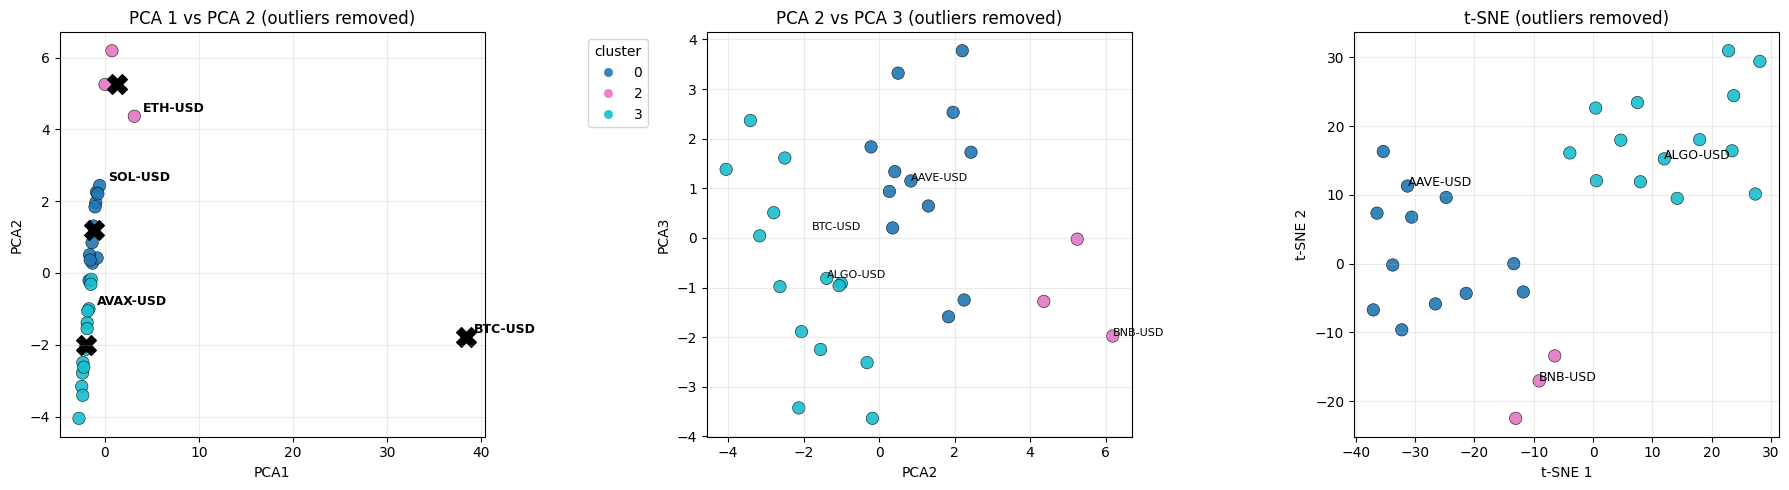

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

try:
    final_df_agg
except NameError:
    numeric_cols = final_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    remove_cols = [c for c in ['target_next_close','target_next_pct'] if c in numeric_cols]
    numeric_cols = [c for c in numeric_cols if c not in remove_cols]
    final_df_agg = final_df.groupby('Symbol')[numeric_cols].agg(['mean','std'])
    final_df_agg.columns = ['_'.join(col).strip() for col in final_df_agg.columns]
    final_df_agg = final_df_agg.reset_index()
    extra = final_df.groupby('Symbol').apply(lambda g: pd.Series({
        'sharpe_ratio': g['pct_change'].mean() / (g['pct_change'].std() + 1e-9),
        'autocorr1': g['pct_change'].autocorr(1)
    })).reset_index()
    final_df_agg = final_df_agg.merge(extra, on='Symbol', how='left')

X_all = final_df_agg.drop(columns=['Symbol']).select_dtypes(include=[np.number]).fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

n_pca = min(10, X_scaled.shape[1])
pca = PCA(n_components=n_pca, random_state=42)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=20)
clusters = kmeans.fit_predict(X_pca[:, :min(5, X_pca.shape[1])])
final_df_agg['cluster'] = clusters

sil = silhouette_score(X_pca[:, :min(5, X_pca.shape[1])], clusters) if X_pca.shape[0] > len(np.unique(clusters)) else np.nan
print(f"Silhouette score (used space): {sil:.4f}")

pc1 = X_pca[:,0]
z = (pc1 - pc1.mean()) / (pc1.std() + 1e-12)

outlier_mask = np.abs(z) > 3
outliers = final_df_agg['Symbol'].values[outlier_mask]
print("Outliers detected (excluded from certain plots):", outliers.tolist())

pc_plot = X_pca[:, :3] if X_pca.shape[1] >= 3 else np.hstack([X_pca, np.zeros((X_pca.shape[0], 3 - X_pca.shape[1]))])
centers = []
for c in sorted(np.unique(clusters)):
    idx = np.where(clusters == c)[0]
    centers.append(pc_plot[idx, :2].mean(axis=0))
centers = np.array(centers)

fig, axes = plt.subplots(1, 3, figsize=(18,5))
cmap = plt.get_cmap('tab10')

mask = ~outlier_mask
ax = axes[0]
scatter = ax.scatter(pc_plot[mask,0], pc_plot[mask,1], c=clusters[mask], cmap=cmap, s=80, alpha=0.9, edgecolors='k', linewidths=0.4)
ax.scatter(centers[:,0], centers[:,1], marker='X', s=200, c='black', label='centroids')
ax.set_title('PCA 1 vs PCA 2 (outliers removed)')
ax.set_xlabel('PCA1'); ax.set_ylabel('PCA2')

for c in sorted(np.unique(clusters)):
    subset = final_df_agg[final_df_agg['cluster']==c].copy()
    vol_cols = [col for col in final_df_agg.columns if 'Volume_mean' in col]
    if len(vol_cols)>0:
        rep = subset.sort_values(vol_cols[0], ascending=False).iloc[0]['Symbol']
    else:
        rep = subset.iloc[0]['Symbol']
    idx = final_df_agg.index[final_df_agg['Symbol']==rep][0]
    ax.annotate(rep, (pc_plot[idx,0], pc_plot[idx,1]), fontsize=9, fontweight='bold', xytext=(6,3), textcoords='offset points')

ax.legend(*scatter.legend_elements(), title="cluster", loc='upper right', bbox_to_anchor=(1.4,1))
ax.grid(alpha=0.25)

ax = axes[1]
if pc_plot.shape[1] >= 3:
    ax.scatter(pc_plot[mask,1], pc_plot[mask,2], c=clusters[mask], cmap=cmap, s=80, alpha=0.9, edgecolors='k', linewidths=0.4)
    ax.set_title('PCA 2 vs PCA 3 (outliers removed)')
    ax.set_xlabel('PCA2'); ax.set_ylabel('PCA3')
    for c in sorted(np.unique(clusters)):
        rep = final_df_agg[final_df_agg['cluster']==c].iloc[0]['Symbol']
        idx = final_df_agg.index[final_df_agg['Symbol']==rep][0]
        ax.annotate(rep, (pc_plot[idx,1], pc_plot[idx,2]), fontsize=8)
    ax.grid(alpha=0.25)
else:
    ax.text(0.5, 0.5, "Not enough PCA dims for PC3", ha='center')

ax = axes[2]
tsne = TSNE(n_components=2, init='pca', random_state=42, perplexity=8)
X_tsne = tsne.fit_transform(X_scaled)
ax.scatter(X_tsne[mask,0], X_tsne[mask,1], c=clusters[mask], cmap=cmap, s=80, alpha=0.9, edgecolors='k', linewidths=0.4)
ax.set_title('t-SNE (outliers removed)')
ax.set_xlabel('t-SNE 1'); ax.set_ylabel('t-SNE 2')
for c in sorted(np.unique(clusters)):
    subset = final_df_agg[final_df_agg['cluster']==c].copy()
    rep = subset.iloc[0]['Symbol']
    idx = final_df_agg.index[final_df_agg['Symbol']==rep][0]
    ax.annotate(rep, (X_tsne[idx,0], X_tsne[idx,1]), fontsize=9)

ax.grid(alpha=0.25)

plt.tight_layout()
plt.show()


In [32]:
meta = final_df.groupby("Symbol").agg(
    avg_volume = ("Volume", "mean"),
    obs_count = ("Date", "count"),
    avg_drawdown = ("drawdown_30", "mean")
).reset_index()


df_clusters = final_df_agg[["Symbol", "cluster"]].merge(meta, on="Symbol", how="left")


selected_coins = []
selection_details = []

for cl in sorted(df_clusters["cluster"].unique()):
    group = df_clusters[df_clusters["cluster"] == cl].copy()

    group = group.sort_values(
        ["avg_volume", "obs_count", "avg_drawdown"],
        ascending=[False, False, True]
    )

    best_coin = group.iloc[0]["Symbol"]
    selected_coins.append(best_coin)

    selection_details.append({
        "cluster": cl,
        "selected_coin": best_coin,
        "avg_volume": group.iloc[0]["avg_volume"],
        "obs_count": group.iloc[0]["obs_count"],
        "avg_drawdown": group.iloc[0]["avg_drawdown"]
    })


selected_df = pd.DataFrame(selection_details)

print("\n===== SELECTED REPRESENTATIVE COINS =====")
print(selected_df)

print("\nFinal list of coins:")
print(selected_coins)



===== SELECTED REPRESENTATIVE COINS =====
   cluster selected_coin    avg_volume  obs_count  avg_drawdown
0        0       SOL-USD  3.434436e+09       1065     -0.245569
1        1       BTC-USD  3.678725e+10       1065     -0.125644
2        2       ETH-USD  1.882966e+10       1065     -0.177761
3        3      AVAX-USD  4.883966e+08       1065     -0.280836

Final list of coins:
['SOL-USD', 'BTC-USD', 'ETH-USD', 'AVAX-USD']


#cluster output files

In [39]:
from pathlib import Path
import pandas as pd
import numpy as np
import json

OUT_DIR = PROJECT_ROOT / "data" /"EDA" / "clustering"
OUT_DIR.mkdir(parents=True, exist_ok=True)

print("Saving outputs to:", OUT_DIR)

cluster_labels_df = pd.DataFrame({
    "symbol": final_df_agg["Symbol"].values,
    "cluster": final_df_agg["cluster"].values,
    "pca_1": X_pca[:, 0],
    "pca_2": X_pca[:, 1],
})

cluster_labels_df.to_csv(OUT_DIR / "cluster_labels.csv", index=False)

cluster_groups = (
    cluster_labels_df
    .groupby("cluster")["symbol"]
    .apply(list)
    .to_dict()
)

with open(OUT_DIR / "cluster_groups.json", "w") as f:
    json.dump(cluster_groups, f, indent=2)

rep_df = pd.DataFrame({
    "cluster": list(range(len(selected_coins))),
    "representative_coin": selected_coins
})

rep_df.to_csv(OUT_DIR / "cluster_representatives.csv", index=False)

selected_df.to_csv(
    OUT_DIR / "cluster_representatives_reasoning.csv",
    index=False
)

if "corr" in globals():
    corr_matrix = corr.copy()
else:
    tmp = final_df.copy()
    tmp.columns = tmp.columns.str.lower()

    tmp["returns"] = (
        tmp.sort_values("date")
           .groupby("symbol")["close"]
           .pct_change()
    )

    pivot = tmp.pivot(
        index="date", columns="symbol", values="returns"
    )
    corr_matrix = pivot.corr()

for coin in rep_df["representative_coin"]:
    if coin not in corr_matrix.columns:
        continue

    corr_series = (
        corr_matrix[coin]
        .drop(index=coin)
        .sort_values(ascending=False)
    )

    corr_series.to_csv(
        OUT_DIR / f"cluster_correlation_{coin}.csv",
        header=["correlation"]
    )

print("All REQUIRED AE2 clustering outputs generated successfully.")
print("Files created:")
for f in sorted(OUT_DIR.iterdir()):
    print(" -", f.name)


Saving outputs to: c:\Users\metalvampire77\Desktop\solent university\programming_for_problem_solving\crypto_forecasting_system\data\EDA\clustering
All REQUIRED AE2 clustering outputs generated successfully.
Files created:
 - cluster_correlation_AVAX-USD.csv
 - cluster_correlation_BTC-USD.csv
 - cluster_correlation_ETH-USD.csv
 - cluster_correlation_SOL-USD.csv
 - cluster_correlation_XRP-USD.csv
 - cluster_groups.json
 - cluster_labels.csv
 - cluster_representatives.csv
 - cluster_representatives_reasoning.csv


In [34]:
rep_df.head()

,cluster,representative_coin
0,0,SOL-USD
1,1,BTC-USD
2,2,ETH-USD
3,3,AVAX-USD


In [35]:
selected_coins = rep_df['representative_coin'].unique()

df_4coins = final_df[final_df['Symbol'].isin(selected_coins)].copy()

df_4coins = df_4coins.sort_values(['Symbol', 'Date']).reset_index(drop=True)


In [36]:
print(f"Number of rows for AVAX-USD: {len(df_4coins[df_4coins['Symbol'] == 'AVAX-USD'])}")

Number of rows for AVAX-USD: 1065


In [37]:
final_df.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name',
       'pct_change', 'log_return', 'lag_1', 'lag_7', 'roll_mean_7',
       'roll_std_7', 'roll_max_7', 'roll_min_7', 'volatility_7',
       'roll_mean_14', 'roll_std_14', 'roll_max_14', 'roll_min_14',
       'volatility_14', 'roll_mean_21', 'roll_std_21', 'roll_max_21',
       'roll_min_21', 'volatility_21', 'rsi_14', 'atr_14', 'macd',
       'macd_signal', 'macd_hist', 'drawdown_30', 'vol_mean_7', 'vol_mean_21',
       'target_next_close', 'target_next_pct'],
      dtype='object')

#train/test split

In [40]:
import pandas as pd

df_4coins['Date'] = pd.to_datetime(df_4coins['Date'])
df_4coins = df_4coins.sort_values(['Symbol', 'Date']).reset_index(drop=True)

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

train_list = []
val_list = []
test_list = []

for coin, g in df_4coins.groupby('Symbol'):
    n = len(g)
    train_end = int(n * train_ratio)
    val_end = int(n * (train_ratio + val_ratio))

    train_list.append(g.iloc[:train_end])
    val_list.append(g.iloc[train_end:val_end])
    test_list.append(g.iloc[val_end:])

train_df = pd.concat(train_list).reset_index(drop=True)
val_df = pd.concat(val_list).reset_index(drop=True)
test_df = pd.concat(test_list).reset_index(drop=True)

print("Train:", train_df.shape)
print("Validation:", val_df.shape)
print("Test:", test_df.shape)


Train: (2980, 37)
Validation: (640, 37)
Test: (640, 37)


#baseline model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

feature_cols = [
    'lag_1',
    'lag_7',
    'roll_mean_7',
    'roll_std_7',
    'volatility_7'
]

target_col = 'target_next_close'

results = []

for coin in train_df['Symbol'].unique():

    train_c = train_df[train_df['Symbol'] == coin]
    val_c   = val_df[val_df['Symbol'] == coin]
    test_c  = test_df[test_df['Symbol'] == coin]

    X_train = train_c[feature_cols]
    y_train = train_c[target_col]

    X_val = val_c[feature_cols]
    y_val = val_c[target_col]

    X_test = test_c[feature_cols]
    y_test = test_c[target_col]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    results.append({
        'Symbol': coin,
        'MAE': mae,
        'RMSE': rmse
    })

results_df = pd.DataFrame(results)
results_df


,Symbol,MAE,RMSE
0,AVAX-USD,1.020715,1.524263
1,BTC-USD,2261.724832,2961.700164
2,ETH-USD,141.028112,190.477930
3,SOL-USD,7.414952,10.128974


In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


X_test = test_df[feature_cols]
y_test = test_df[target_col]


y_test_pred = lr.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Baseline Linear Regression - TEST SET")
print(f"MAE  : {test_mae:.4f}")
print(f"RMSE : {test_rmse:.4f}")


Baseline Linear Regression - TEST SET
MAE  : 699.8410
RMSE : 1629.2080


#random forest

In [45]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

BASE_PATH = PROJECT_ROOT / "models"
os.makedirs(BASE_PATH, exist_ok=True)

feature_cols = [
    'lag_1',
    'lag_7',
    'roll_mean_7',
    'roll_std_7',
    'volatility_7',
    'rsi_14',
    'macd',
    'macd_signal'
]

target_col = 'target_next_close'
MAX_FORECAST_DAYS = 180   # 6 months
coins = rep_df['representative_coin'].unique()

def forecast_next_days(model, last_row, start_date, n_days):
    forecasts = []
    current = last_row.copy()
    current_date = pd.to_datetime(start_date)

    for step in range(1, n_days + 1):
        X_step = pd.DataFrame([current[feature_cols]])
        pred_close = model.predict(X_step)[0]

        current_date += pd.Timedelta(days=1)

        forecasts.append({
            'Date': current_date,
            'Day_Number': step,
            'Forecast_Close': pred_close
        })

        current['lag_7'] = current['lag_1']
        current['lag_1'] = pred_close

        current['roll_mean_7'] = (current['roll_mean_7'] * 6 + pred_close) / 7

    return pd.DataFrame(forecasts)

for coin in coins:
    coin_df = df_4coins[df_4coins['Symbol'] == coin].copy()
    coin_df = coin_df.sort_values('Date').reset_index(drop=True)

    X = coin_df[feature_cols]
    y = coin_df[target_col]

    rf = RandomForestRegressor(
        n_estimators=300,
        max_depth=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X, y)

    coin_df['rf_predicted_close'] = rf.predict(X)

    past_path = f"{BASE_PATH}/{coin}_rf_past_predictions.csv"
    coin_df[['Date', 'Symbol', 'Close', 'rf_predicted_close']].to_csv(
        past_path, index=False
    )

    last_row = coin_df.iloc[-1]
    last_date = coin_df['Date'].iloc[-1]

    forecast_df = forecast_next_days(
        model=rf,
        last_row=last_row,
        start_date=last_date,
        n_days=MAX_FORECAST_DAYS
    )

    forecast_df['Symbol'] = coin

    forecast_path = f"{BASE_PATH}/{coin}_rf_forecast_next_6_months.csv"
    forecast_df.to_csv(forecast_path, index=False)

print("✅ RF past predictions + full 6-month future forecasts saved correctly")

✅ RF past predictions + full 6-month future forecasts saved correctly


#arima

In [49]:
import os
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

BASE_PATH = PROJECT_ROOT / "models"
os.makedirs(BASE_PATH, exist_ok=True)

MAX_FORECAST_DAYS = 180
coins = rep_df['representative_coin'].unique()

for coin in coins:
    coin_df = df_4coins[df_4coins['Symbol'] == coin].copy()

    coin_df['Date'] = pd.to_datetime(coin_df['Date'])
    coin_df = coin_df.sort_values('Date')
    coin_df = coin_df.set_index('Date')

    coin_df = coin_df.asfreq('D')

    coin_df['Close'] = coin_df['Close'].interpolate(method='linear')

    close_series = coin_df['Close']

    p_value = adfuller(close_series.dropna())[1]
    d = 0 if p_value < 0.05 else 1

    model = ARIMA(close_series, order=(5, d, 0))
    fitted = model.fit()

    past_df = pd.DataFrame({
        'Date': close_series.index,
        'Close': close_series.values,
        'arima_fitted_close': fitted.fittedvalues
    }).dropna()

    past_path = f"{BASE_PATH}/{coin}_arima_past_predictions.csv"
    past_df.to_csv(past_path, index=False)

    forecast = fitted.forecast(steps=MAX_FORECAST_DAYS)

    future_dates = pd.date_range(
        start=close_series.index[-1] + pd.Timedelta(days=1),
        periods=MAX_FORECAST_DAYS,
        freq='D'
    )

    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'Day_Number': np.arange(1, MAX_FORECAST_DAYS + 1),
        'Forecast_Close': forecast.values,
        'Symbol': coin
    })

    forecast_path = f"{BASE_PATH}/{coin}_arima_forecast_next_6_months.csv"
    forecast_df.to_csv(forecast_path, index=False)

print("✅ ARIMA completed with explicit daily frequency (no warnings)")


✅ ARIMA completed with explicit daily frequency (no warnings)


#lstm

In [51]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

BASE_PATH = PROJECT_ROOT / "models"
os.makedirs(BASE_PATH, exist_ok=True)

LOOKBACK = 30
FORECAST_DAYS = 180
EPOCHS = 30
BATCH_SIZE = 32

coins = rep_df['representative_coin'].unique()

tf.random.set_seed(42)
np.random.seed(42)

def create_sequences(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i])
        y.append(data[i])
    return np.array(X), np.array(y)

for coin in coins:
    coin_df = df_4coins[df_4coins['Symbol'] == coin].copy()

    coin_df['Date'] = pd.to_datetime(coin_df['Date'])
    coin_df = coin_df.sort_values('Date')
    coin_df = coin_df.set_index('Date').asfreq('D')

    coin_df['Close'] = coin_df['Close'].interpolate()

    close_values = coin_df[['Close']].values

    scaler = MinMaxScaler()
    scaled_close = scaler.fit_transform(close_values)

    X, y = create_sequences(scaled_close, LOOKBACK)

    split = int(len(X) * 0.8)
    X_train, X_val = X[:split], X[split:]
    y_train, y_val = y[:split], y[split:]


    model = Sequential([
        Input(shape=(LOOKBACK, 1)),
        LSTM(64),
        Dense(1)
    ])

    model.compile(
        optimizer='adam',
        loss='mse'
    )

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=[early_stop],
        verbose=0
    )

    past_preds_scaled = model.predict(X, verbose=0)
    past_preds = scaler.inverse_transform(past_preds_scaled)

    past_df = coin_df.iloc[LOOKBACK:].copy()
    past_df['lstm_predicted_close'] = past_preds.flatten()

    past_path = f"{BASE_PATH}/{coin}_lstm_past_predictions.csv"
    past_df.reset_index()[['Date', 'Close', 'lstm_predicted_close']].to_csv(
        past_path, index=False
    )

    last_sequence = scaled_close[-LOOKBACK:].reshape(1, LOOKBACK, 1)
    future_preds = []

    for step in range(FORECAST_DAYS):
        next_pred_scaled = model.predict(last_sequence, verbose=0)
        next_pred = scaler.inverse_transform(next_pred_scaled)[0, 0]
        future_preds.append(next_pred)

        last_sequence = np.concatenate(
            [last_sequence[:, 1:, :], next_pred_scaled.reshape(1, 1, 1)],
            axis=1
        )

    future_dates = pd.date_range(
        start=coin_df.index[-1] + pd.Timedelta(days=1),
        periods=FORECAST_DAYS,
        freq='D'
    )

    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'Day_Number': np.arange(1, FORECAST_DAYS + 1),
        'Forecast_Close': future_preds,
        'Symbol': coin
    })

    forecast_path = f"{BASE_PATH}/{coin}_lstm_forecast_next_6_months.csv"
    forecast_df.to_csv(forecast_path, index=False)

print("✅ LSTM completed — ZERO warnings, clean 6-month forecasts saved")


✅ LSTM completed — ZERO warnings, clean 6-month forecasts saved


#prophet

In [52]:
import os
import pandas as pd
import numpy as np
from prophet import Prophet

BASE_PATH = PROJECT_ROOT / "models"
os.makedirs(BASE_PATH, exist_ok=True)

FORECAST_DAYS = 180
coins = rep_df['representative_coin'].unique()

for coin in coins:
    coin_df = df_4coins[df_4coins['Symbol'] == coin].copy()

    coin_df['Date'] = pd.to_datetime(coin_df['Date'])
    coin_df = coin_df.sort_values('Date')

    coin_df = (
        coin_df
        .set_index('Date')
        .asfreq('D')
        .reset_index()
    )

    coin_df['Close'] = coin_df['Close'].interpolate(method='linear')

    prophet_df = coin_df[['Date', 'Close']].rename(
        columns={'Date': 'ds', 'Close': 'y'}
    )

    model = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=False
    )

    model.fit(prophet_df)

    past_forecast = model.predict(prophet_df)

    past_df = pd.DataFrame({
        'Date': prophet_df['ds'],
        'Close': prophet_df['y'],
        'prophet_predicted_close': past_forecast['yhat']
    })

    past_path = f"{BASE_PATH}/{coin}_prophet_past_predictions.csv"
    past_df.to_csv(past_path, index=False)

    future_df = model.make_future_dataframe(
        periods=FORECAST_DAYS,
        freq='D',
        include_history=False
    )

    future_forecast = model.predict(future_df)

    forecast_df = pd.DataFrame({
        'Date': future_forecast['ds'],
        'Day_Number': np.arange(1, FORECAST_DAYS + 1),
        'Forecast_Close': future_forecast['yhat'],
        'Symbol': coin
    })

    forecast_path = f"{BASE_PATH}/{coin}_prophet_forecast_next_6_months.csv"
    forecast_df.to_csv(forecast_path, index=False)

print("✅ Prophet completed — clean past predictions and 6-month forecasts saved")


c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
17:54:51 - cmdstanpy - INFO - Chain [1] start processing
17:54:53 - cmdstanpy - INFO - Chain [1] done processing
17:54:54 - cmdstanpy - INFO - Chain [1] start processing
17:54:54 - cmdstanpy - INFO - Chain [1] done processing
17:54:55 - cmdstanpy - INFO - Chain [1] start processing
17:54:55 - cmdstanpy - INFO - Chain [1] done processing
17:54:55 - cmdstanpy - INFO - Chain [1] start processing
17:54:56 - cmdstanpy - INFO - Chain [1] done processing


✅ Prophet completed — clean past predictions and 6-month forecasts saved


#visualisation


📈 Plotting Random Forest results


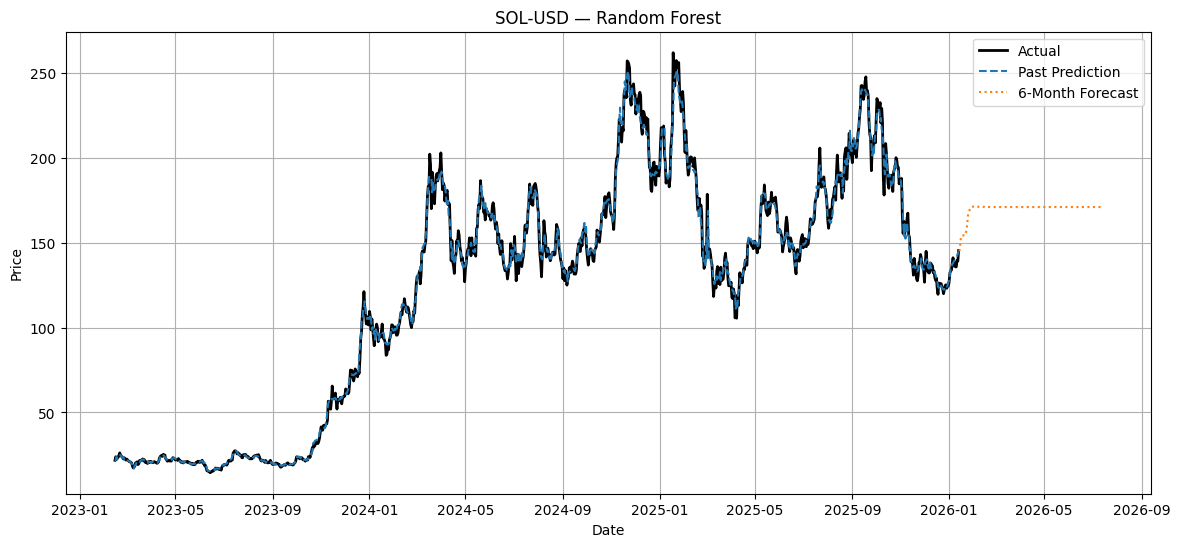

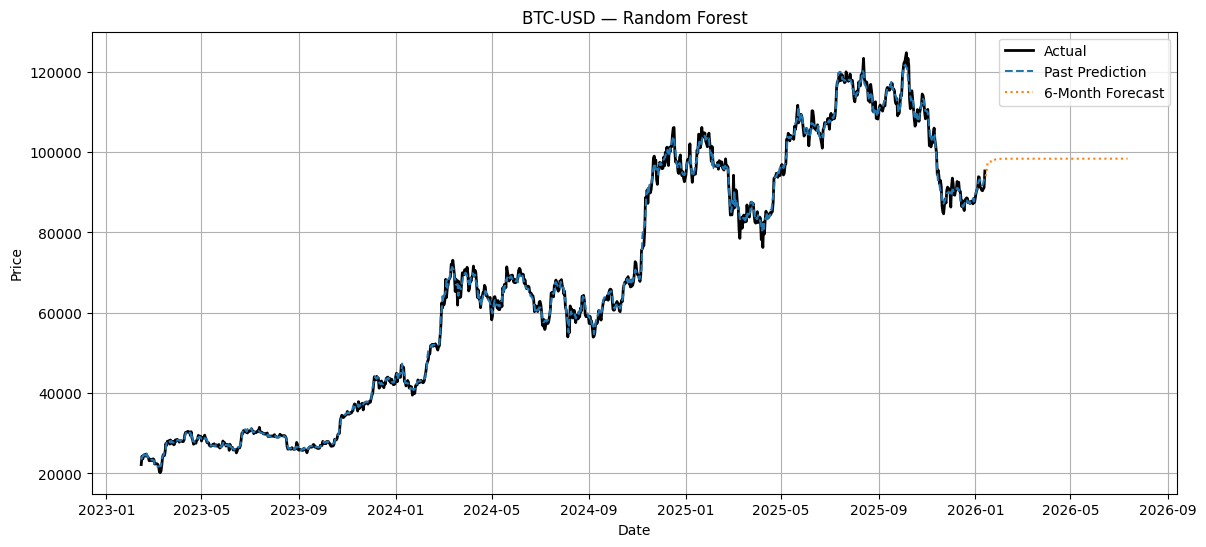

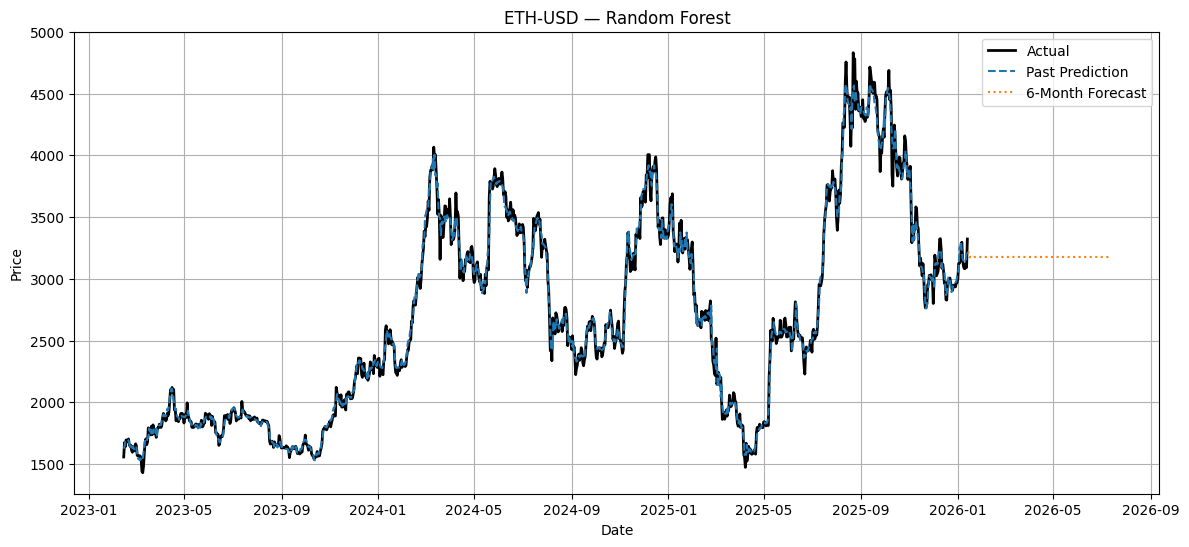

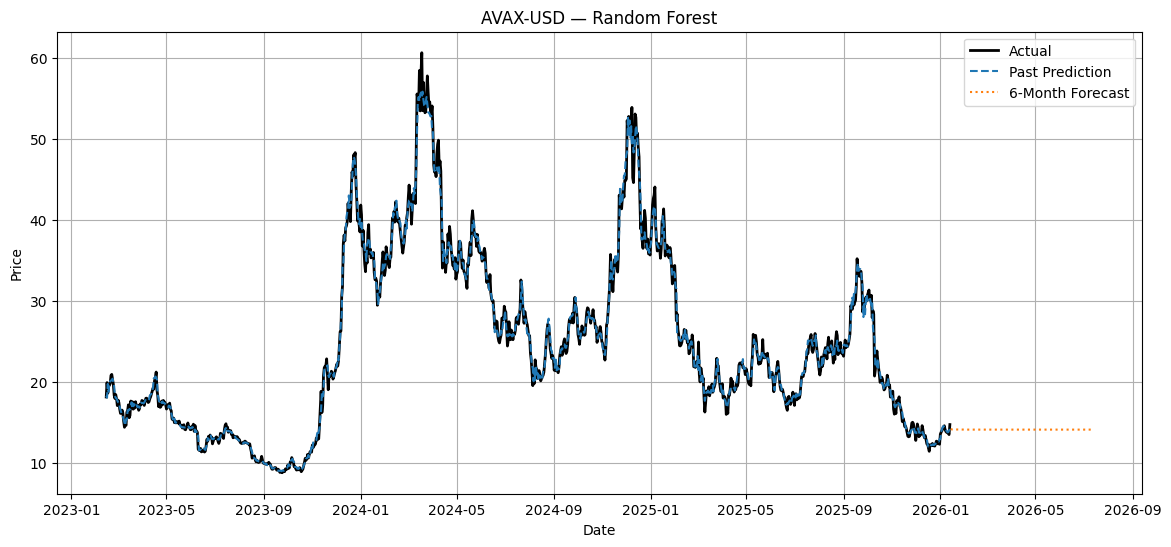


📈 Plotting ARIMA results


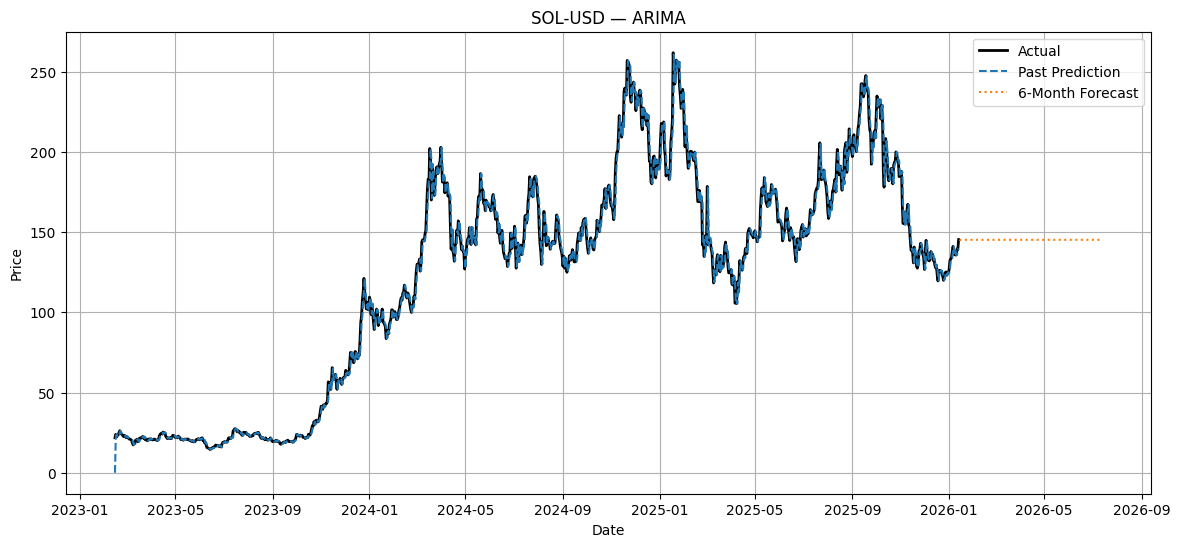

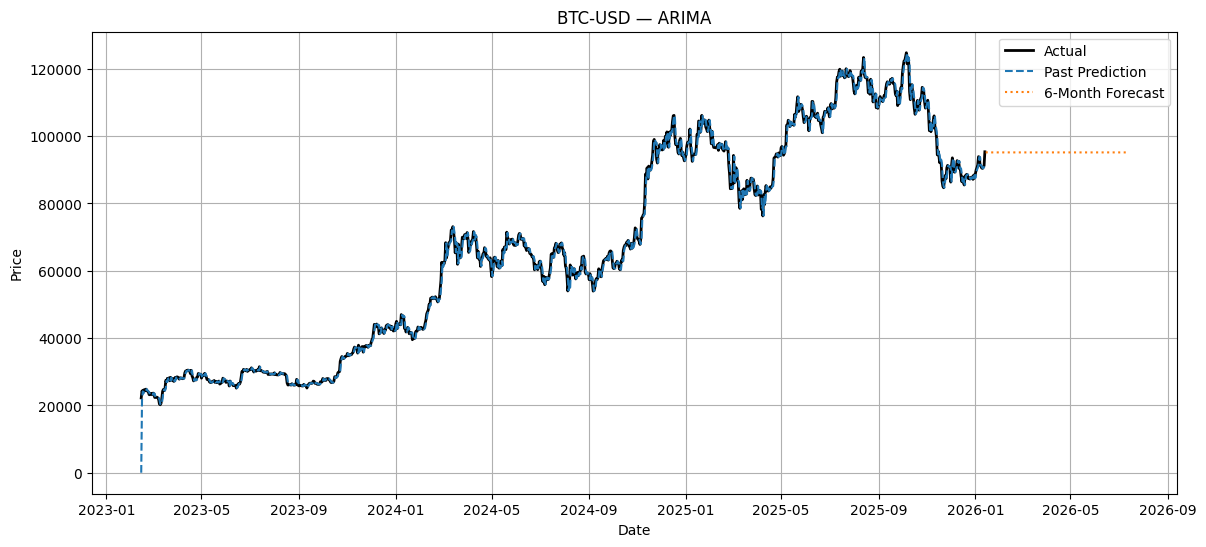

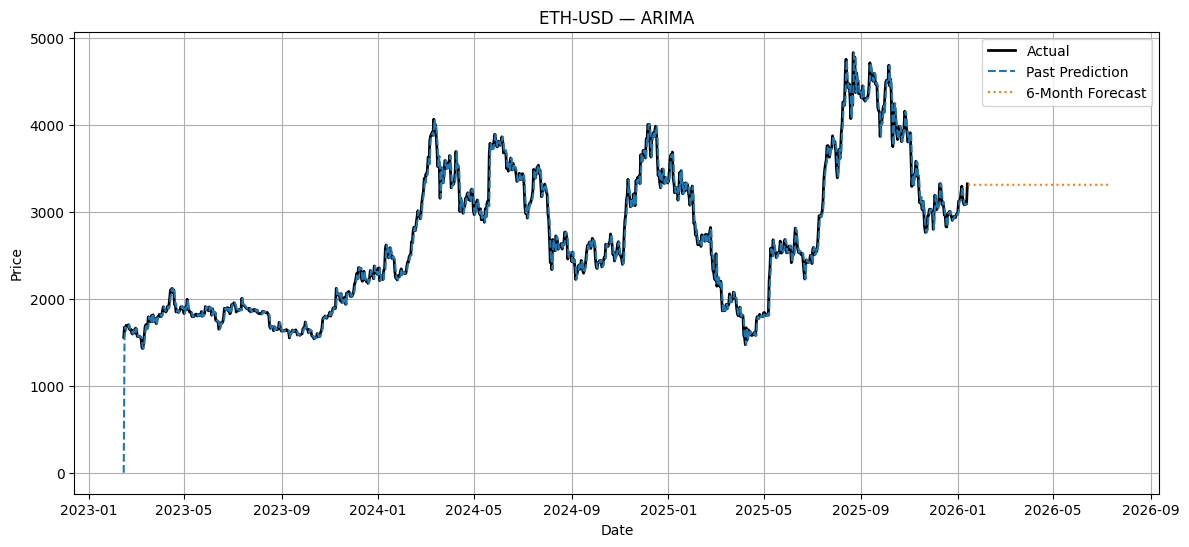

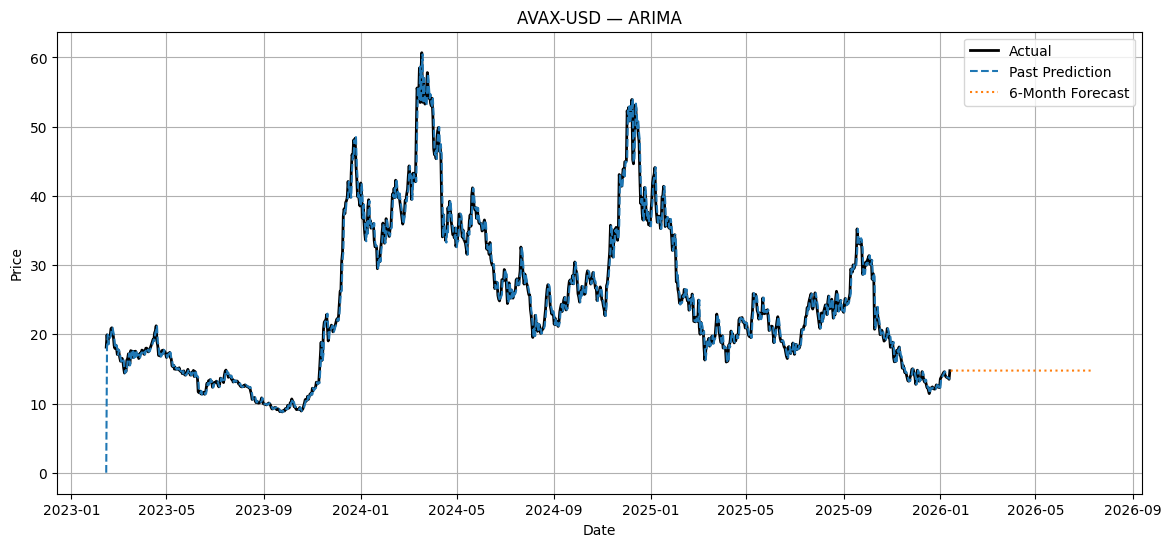


📈 Plotting LSTM results


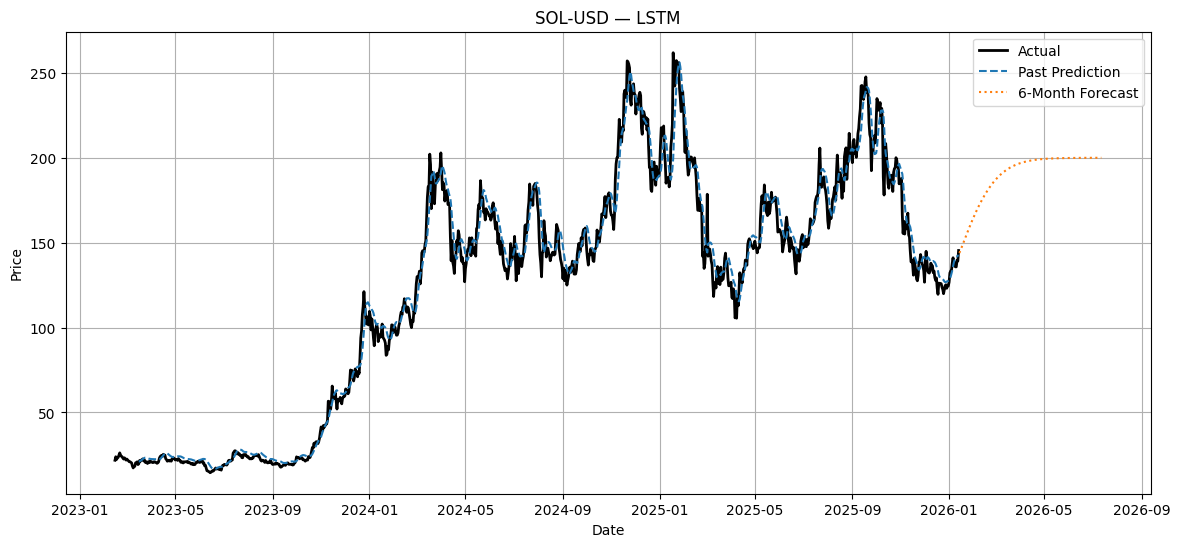

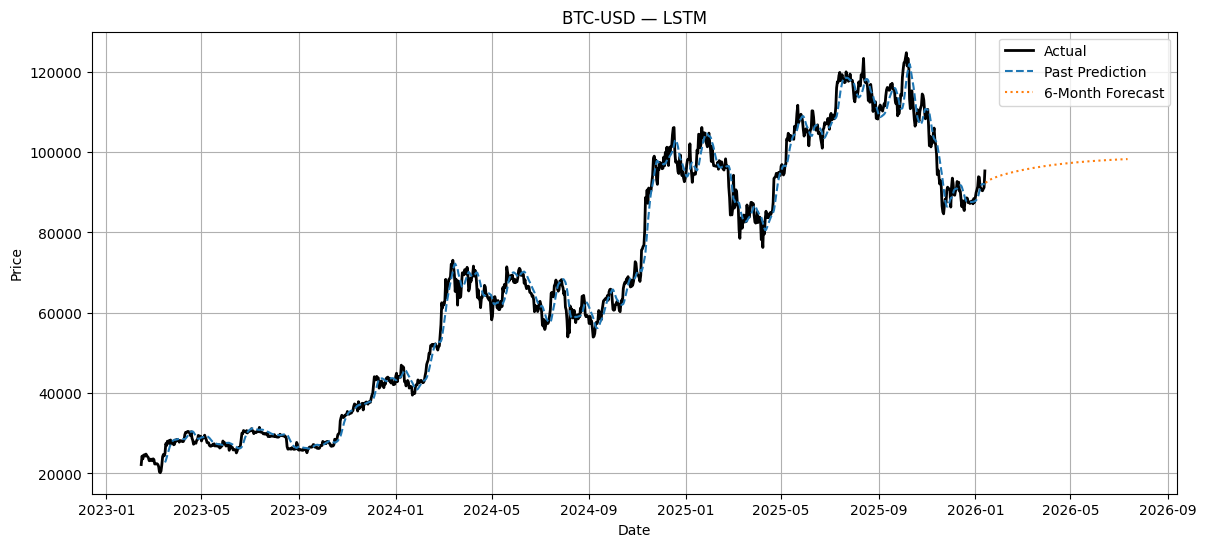

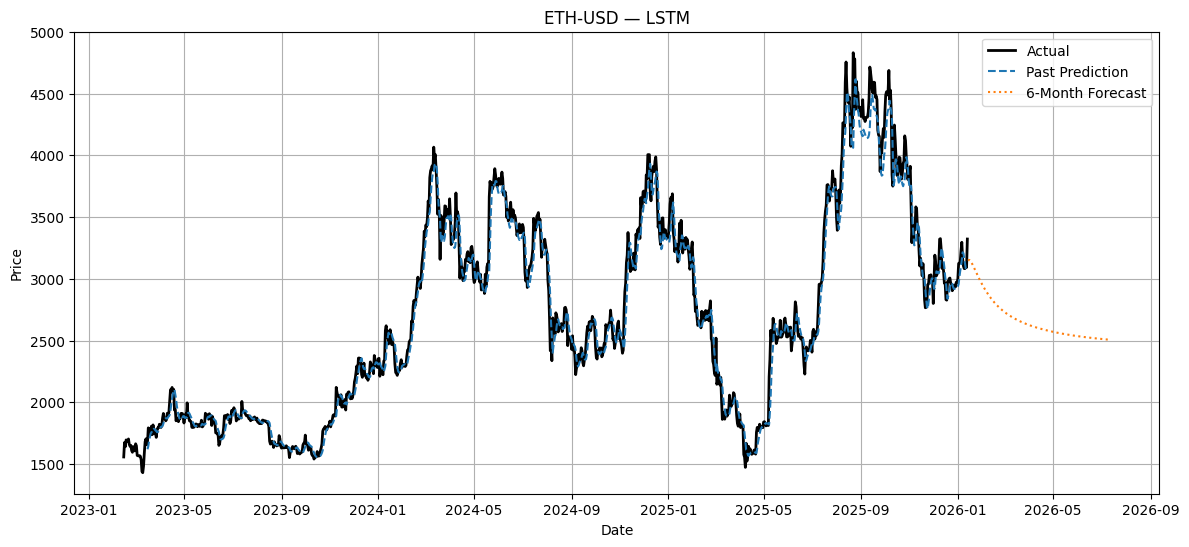

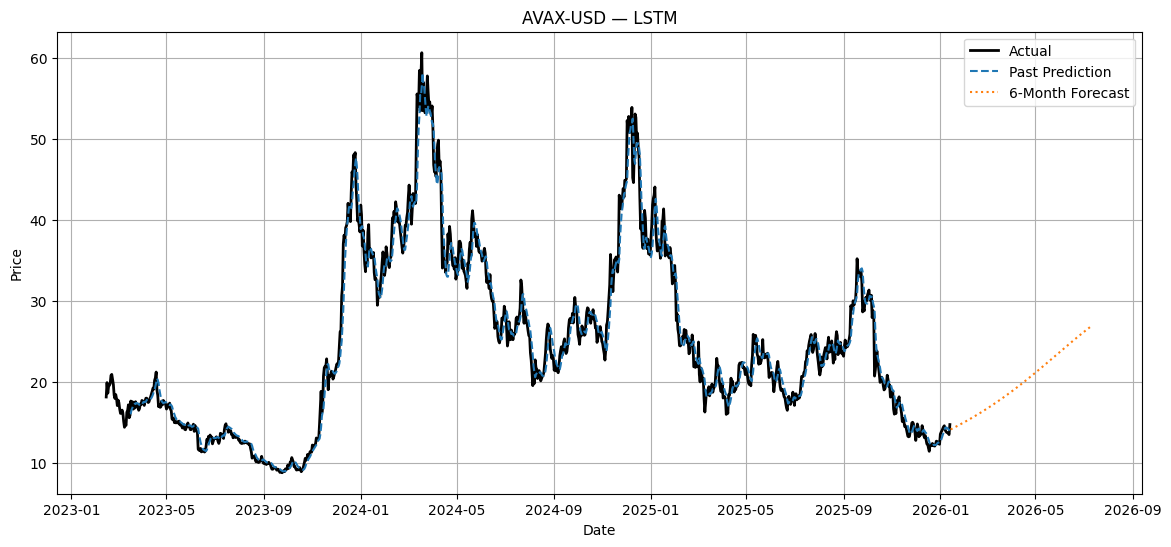


📈 Plotting Prophet results


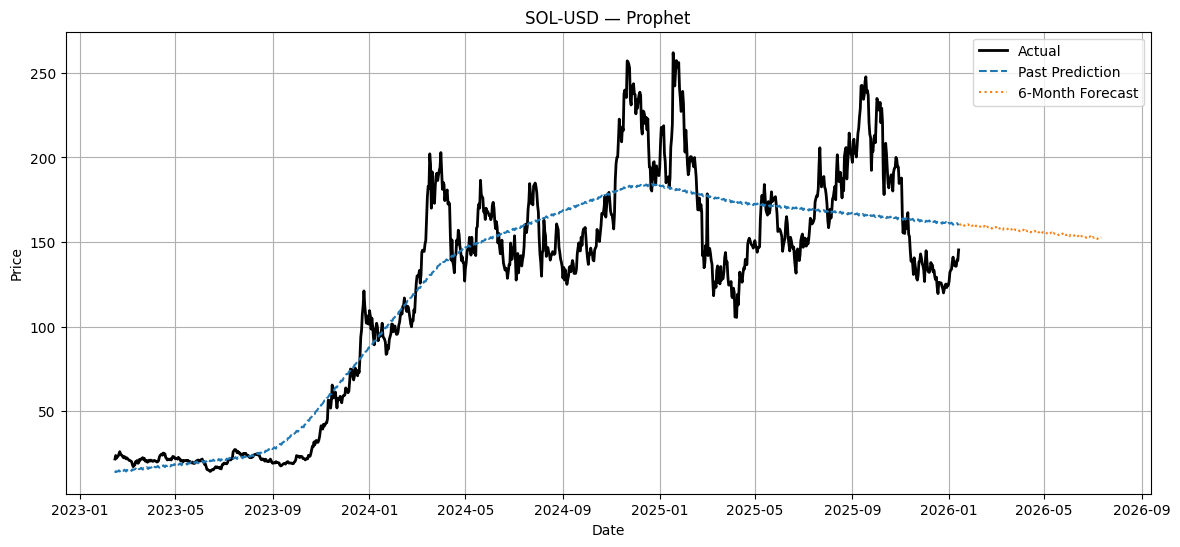

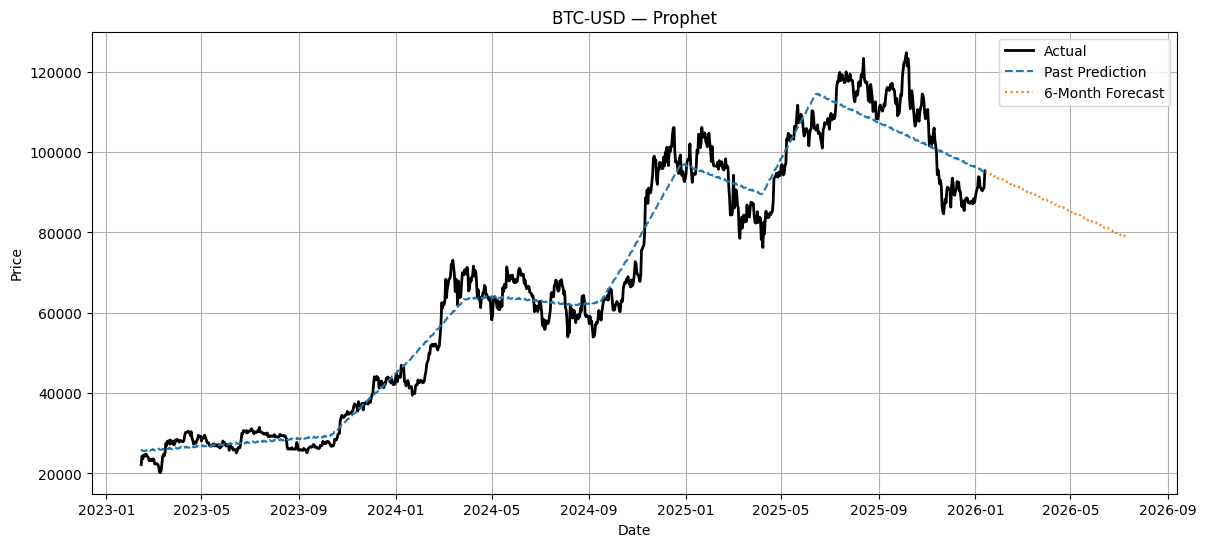

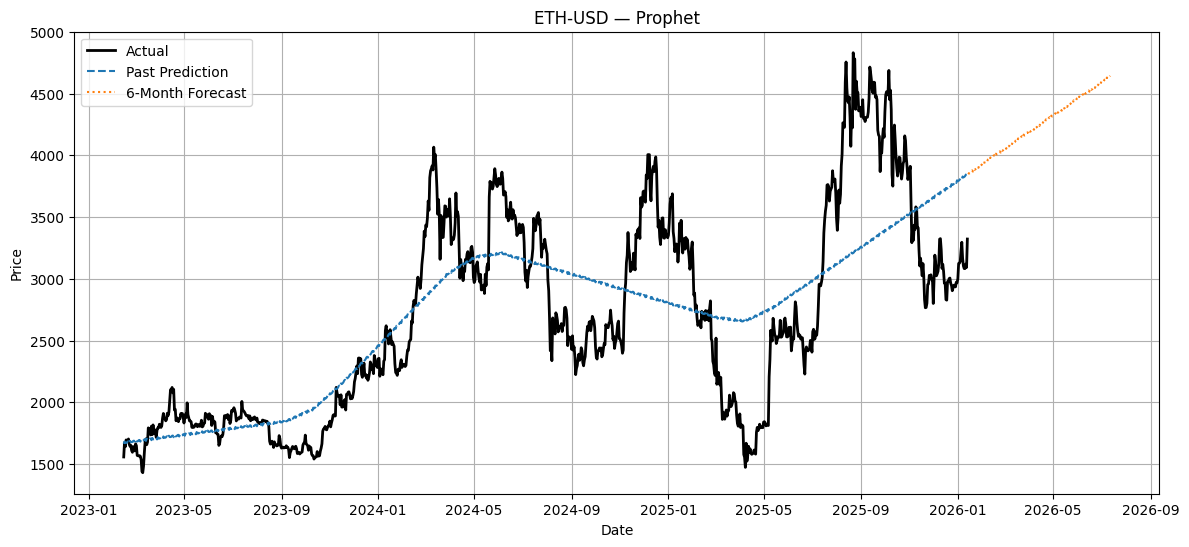

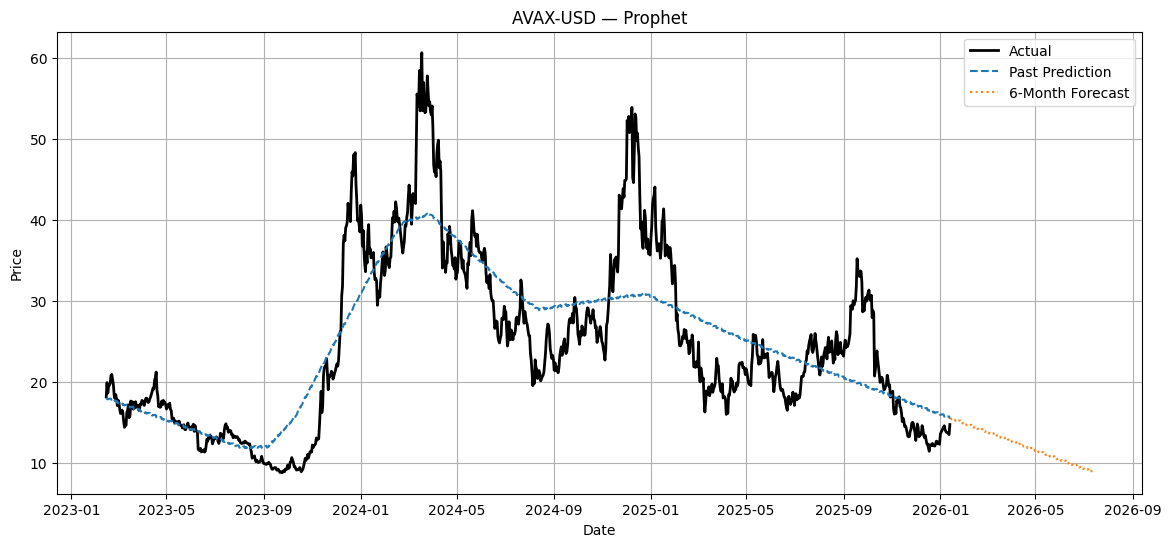

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

BASE_PATH = PROJECT_ROOT / "models"
coins = rep_df['representative_coin'].unique()

models = {
    "Random Forest": {
        "past": "rf_past_predictions",
        "forecast": "rf_forecast_next_6_months",
        "pred_col": "rf_predicted_close"
    },
    "ARIMA": {
        "past": "arima_past_predictions",
        "forecast": "arima_forecast_next_6_months",
        "pred_col": "arima_fitted_close"
    },
    "LSTM": {
        "past": "lstm_past_predictions",
        "forecast": "lstm_forecast_next_6_months",
        "pred_col": "lstm_predicted_close"
    },
    "Prophet": {
        "past": "prophet_past_predictions",
        "forecast": "prophet_forecast_next_6_months",
        "pred_col": "prophet_predicted_close"
    }
}

for model_name, cfg in models.items():

    print(f"\n📈 Plotting {model_name} results")

    for coin in coins:

        actual_df = pd.read_csv(
            f"{BASE_PATH}/{coin}_rf_past_predictions.csv",
            parse_dates=['Date']
        )

        past_df = pd.read_csv(
            f"{BASE_PATH}/{coin}_{cfg['past']}.csv",
            parse_dates=['Date']
        )

        forecast_df = pd.read_csv(
            f"{BASE_PATH}/{coin}_{cfg['forecast']}.csv",
            parse_dates=['Date']
        )

        plt.figure(figsize=(14, 6))

        plt.plot(
            actual_df['Date'],
            actual_df['Close'],
            label="Actual",
            color="black",
            linewidth=2
        )

        plt.plot(
            past_df['Date'],
            past_df[cfg['pred_col']],
            label="Past Prediction",
            linestyle="--"
        )

        plt.plot(
            forecast_df['Date'],
            forecast_df['Forecast_Close'],
            label="6-Month Forecast",
            linestyle=":"
        )

        plt.title(f"{coin} — {model_name}")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.grid(True)

        plt.show()


#evaluation

In [55]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)


MODELS_PATH = PROJECT_ROOT / "models"
OUTPUT_PATH = os.path.join(MODELS_PATH, "evaluation_results.csv")

coins = ["BTC-USD", "ETH-USD", "SOL-USD", "AVAX-USD"]

models = {
    "Random Forest": {
        "file": "rf_past_predictions",
        "pred_col": "rf_predicted_close"
    },
    "ARIMA": {
        "file": "arima_past_predictions",
        "pred_col": "arima_fitted_close"
    },
    "LSTM": {
        "file": "lstm_past_predictions",
        "pred_col": "lstm_predicted_close"
    },
    "Prophet": {
        "file": "prophet_past_predictions",
        "pred_col": "prophet_predicted_close"
    }
}

results = []

for coin in coins:
    for model_name, cfg in models.items():

        file_path = os.path.join(
            MODELS_PATH,
            f"{coin}_{cfg['file']}.csv"
        )

        df = pd.read_csv(file_path)

        df = df.dropna(subset=["Close", cfg["pred_col"]])

        y_true = df["Close"].values
        y_pred = df[cfg["pred_col"]].values

        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))

        mape = np.mean(
            np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))
        ) * 100

        r2 = r2_score(y_true, y_pred)

        results.append({
            "Symbol": coin,
            "Model": model_name,
            "MAE": mae,
            "RMSE": rmse,
            "MAPE (%)": mape,
            "R2": r2
        })

evaluation_df = pd.DataFrame(results)
evaluation_df.to_csv(OUTPUT_PATH, index=False)

print("✅ FULL evaluation completed (MAE, RMSE, MAPE, R²)")
print("📄 Saved to models/evaluation_results.csv")


✅ FULL evaluation completed (MAE, RMSE, MAPE, R²)
📄 Saved to models/evaluation_results.csv


#model outputs